In [283]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [284]:
files = [file for file in os.listdir(r"C:\Users\nazir\Desktop\DA\E-Commerce\Sales_Data")]

In [285]:
for file in files[1:]:
    print(file)

all_data1
Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [286]:
path = r'C:\Users\nazir\Desktop\DA\E-Commerce\Sales_Data'
all_data1 = pd.DataFrame()
for file in files[1:]:
    current_df = pd.read_csv(path + "/" + file)
    all_data1 = pd.concat([all_data1, current_df])

all_data1.shape

(560550, 6)

In [287]:
all_data1.to_csv(r'C:\Users\nazir\Desktop\DA\E-Commerce\Sales_Data/all_data1', index= False)

In [288]:
all_data1.isna().sum()

Order ID            1635
Product             1635
Quantity Ordered    1635
Price Each          1635
Order Date          1635
Purchase Address    1635
dtype: int64

In [289]:
all_data1.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [290]:
all_data1 = all_data1.dropna()

In [291]:
all_data1.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

#### What is the best month for sale?

In [292]:
import datetime as dt

In [293]:
a = pd.to_datetime('04/19/19 08:46')
type(a) != pd.Timestamp

False

In [294]:
a.day
a.month

4

In [295]:
# def split_date(data):
#     df = data
#     date = pd.to_datetime(df["Order Date"])
#     df['day'] = date.day
#     df['month'] = date.month
#     return df

In [296]:
def split_date(date):
    month = date.split('/')[0]
    return month

In [297]:
split_date('04/19/19 08:46')

'04'

In [298]:
all_data1['month'] = all_data1['Order Date'].apply(split_date)

In [299]:
all_data1.tail(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09
11685,259357,USB-C Charging Cable,1,11.95,09/30/19 00:18,"250 Meadow St, San Francisco, CA 94016",09


In [300]:
all_data1.dtypes # Checking data types of the various columns

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
month               object
dtype: object

In [301]:
all_data1["Quantity Ordered"].unique()

array(['2', '1', '3', '5', 'Quantity Ordered', '4', '7', '6', '8', '9'],
      dtype=object)

In [302]:
all_data1["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [303]:
new = all_data1[all_data1['Quantity Ordered'] == 'Quantity Ordered']
new.shape

(1065, 7)

In [304]:
all_data1['Quantity Ordered'] = all_data1['Quantity Ordered'].replace(("Quantity Ordered"), np.nan)

In [305]:
all_data1['Quantity Ordered'].unique()

array(['2', '1', '3', '5', nan, '4', '7', '6', '8', '9'], dtype=object)

In [306]:
all_data1 = all_data1.dropna(subset=['Quantity Ordered'])

In [307]:
all_data1['Quantity Ordered'].unique()

array(['2', '1', '3', '5', '4', '7', '6', '8', '9'], dtype=object)

In [308]:
all_data1["Price Each"].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)

In [309]:
all_data1["month"].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

In [310]:
### Converting columns required for calculating sales into integers and float
all_data1["Quantity Ordered"] = all_data1["Quantity Ordered"].astype(int)
all_data1["Price Each"] = all_data1["Price Each"].astype(float)
all_data1["month"] = all_data1["month"].astype(int)

In [311]:
all_data1.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
month                 int32
dtype: object

In [312]:
all_data1['sales'] = all_data1['Quantity Ordered'] * all_data1['Price Each']

In [313]:
all_data1.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [314]:
months = range(1, 13)

In [315]:
aggregated_df = all_data1.groupby('month').sum()
aggregated_df.head(5)

C:\Users\nazir\AppData\Local\Temp\ipykernel_22952\3057409566.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aggregated_df = all_data1.groupby('month').sum()


,Quantity Ordered,Price Each,sales
month,,,
1,32709,5435305.14,5466770.19
2,40347,6566654.16,6606067.26
3,51015,8373623.49,8421301.14
4,61674,10103013.06,10172010.72
5,56001,9405375.39,9457820.25


In [316]:
aggregated_df = aggregated_df.reset_index()
aggregated_df.head(5)

,month,Quantity Ordered,Price Each,sales
0,1,32709,5435305.14,5466770.19
1,2,40347,6566654.16,6606067.26
2,3,51015,8373623.49,8421301.14
3,4,61674,10103013.06,10172010.72
4,5,56001,9405375.39,9457820.25


Text(0.5, 1.0, 'Monthly Sales')

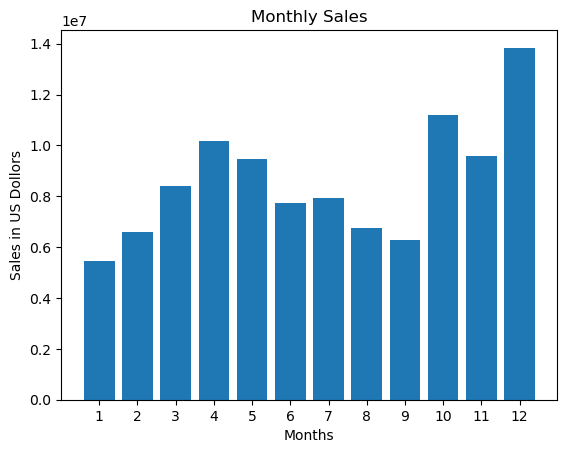

In [317]:
plt.bar(aggregated_df['month'], aggregated_df['sales'])
plt.xticks(aggregated_df['month'])
plt.xlabel('Months')
plt.ylabel('Sales in US Dollors')
plt.title("Monthly Sales")

####  Which city has max order

In [318]:
#### Writing a function to return city name from the purchase address column

def city(address):
    address = address.split(",")[1].strip()
    return address


In [319]:
city('917 1st St, Dallas, TX 75001')

'Dallas'

In [320]:
all_data1['city'] = all_data1["Purchase Address"].apply(city)
all_data1.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


In [321]:
Most_city = pd.DataFrame(all_data1['city'].value_counts().reset_index().rename(columns = {'index':'City', 'city':'Counts'}))
Most_city

,City,Counts
0,San Francisco,134196
1,Los Angeles,88815
2,New York City,74628
3,Boston,59802
4,Atlanta,44643
5,Dallas,44460
6,Seattle,44196
7,Portland,37395
8,Austin,29715


Text(0, 0.5, 'Orders')

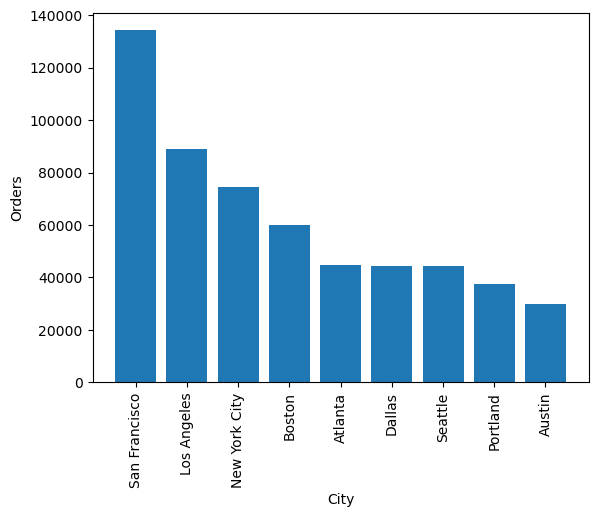

In [322]:
plt.bar(Most_city['City'], Most_city['Counts'])
plt.xticks(rotation = 90)
plt.xlabel('City')
plt.ylabel('Orders')

#### At what time is the purchase of product max

In [323]:
all_data1.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles


In [324]:
all_data1['hours'] = pd.to_datetime(all_data1['Order Date']).dt.hour

In [325]:
all_data1.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14


In [326]:
hours = []
orders_made = []

for key, df, in all_data1.groupby('hours'):
    hours.append(key)
    orders_made.append(len(df))

In [327]:
hours

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [328]:
orders_made

[11730,
 7050,
 3729,
 2493,
 2562,
 3963,
 7446,
 12033,
 18768,
 26244,
 32832,
 37233,
 37761,
 36387,
 32952,
 30525,
 31152,
 32697,
 36840,
 38715,
 36684,
 32763,
 26466,
 18825]

Text(0, 0.5, 'Orders Made')

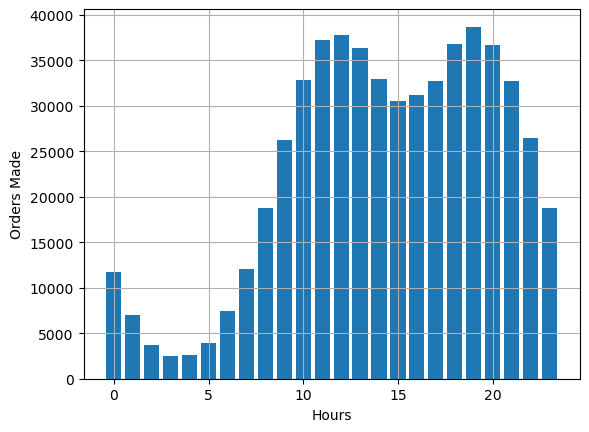

In [329]:
plt.bar(hours, orders_made)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Orders Made")

Text(0, 0.5, 'Orders Made')

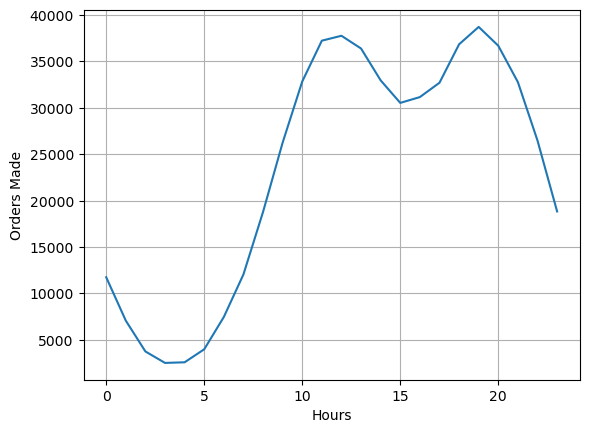

In [330]:
plt.plot(hours, orders_made)
plt.grid()
plt.xlabel("Hours")
plt.ylabel("Orders Made")

#### What is the frequently purchased product?

In [331]:
all_data1.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14


In [332]:
most_sold_df = pd.DataFrame(all_data1['Product'].value_counts().reset_index().rename(columns = {'index': 'product', 'Product': 'frequency'}))
most_sold_df.head(3)

,product,frequency
0,USB-C Charging Cable,65709
1,Lightning Charging Cable,64974
2,AAA Batteries (4-pack),61923


Text(0, 0.5, 'Quantity Sold')

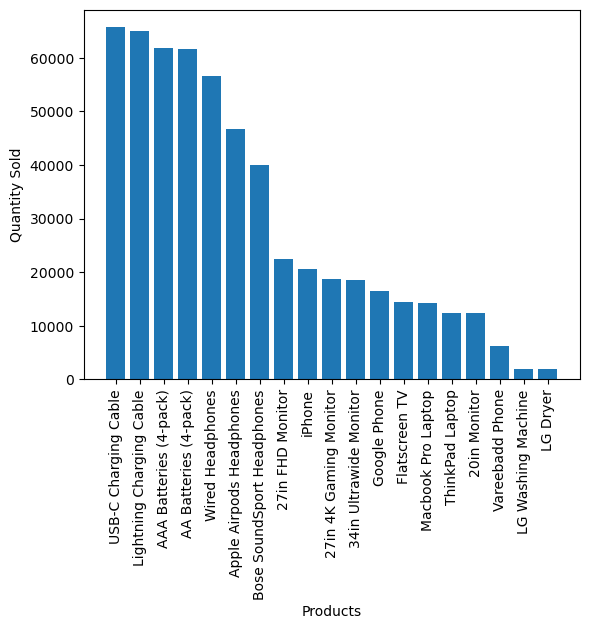

In [333]:
plt.bar(most_sold_df['product'], most_sold_df['frequency'])
plt.xticks(rotation = 90)
plt.xlabel('Products')
plt.ylabel('Quantity Sold')

#### What product has the highest ordered quantity

<Axes: xlabel='Product'>

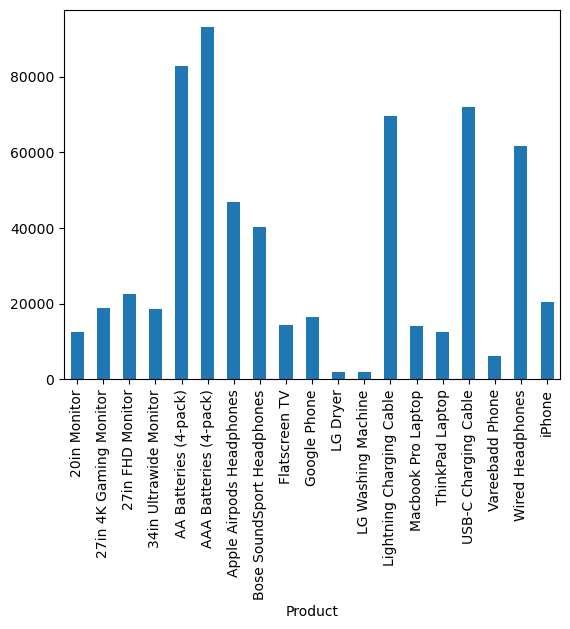

In [334]:
all_data1.groupby('Product')['Quantity Ordered'].sum().plot(kind = 'bar')

####  Why is AAA Batteries (4-pack) the most ordered product?


In [335]:
all_data1.groupby('Product')['Price Each'].mean()

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

#### Perhaps, it is the most ordered product because it has the lowest mean price

In [336]:
products = all_data1.groupby('Product')['Quantity Ordered'].sum().index
quantity_ordered = all_data1.groupby('Product')['Quantity Ordered'].sum()
avg_price = all_data1.groupby('Product')['Price Each'].mean()

C:\Users\nazir\AppData\Local\Temp\ipykernel_22952\4019129089.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation = 'vertical')


[Text(0, 0, '20in Monitor'),
 Text(1, 0, '27in 4K Gaming Monitor'),
 Text(2, 0, '27in FHD Monitor'),
 Text(3, 0, '34in Ultrawide Monitor'),
 Text(4, 0, 'AA Batteries (4-pack)'),
 Text(5, 0, 'AAA Batteries (4-pack)'),
 Text(6, 0, 'Apple Airpods Headphones'),
 Text(7, 0, 'Bose SoundSport Headphones'),
 Text(8, 0, 'Flatscreen TV'),
 Text(9, 0, 'Google Phone'),
 Text(10, 0, 'LG Dryer'),
 Text(11, 0, 'LG Washing Machine'),
 Text(12, 0, 'Lightning Charging Cable'),
 Text(13, 0, 'Macbook Pro Laptop'),
 Text(14, 0, 'ThinkPad Laptop'),
 Text(15, 0, 'USB-C Charging Cable'),
 Text(16, 0, 'Vareebadd Phone'),
 Text(17, 0, 'Wired Headphones'),
 Text(18, 0, 'iPhone')]

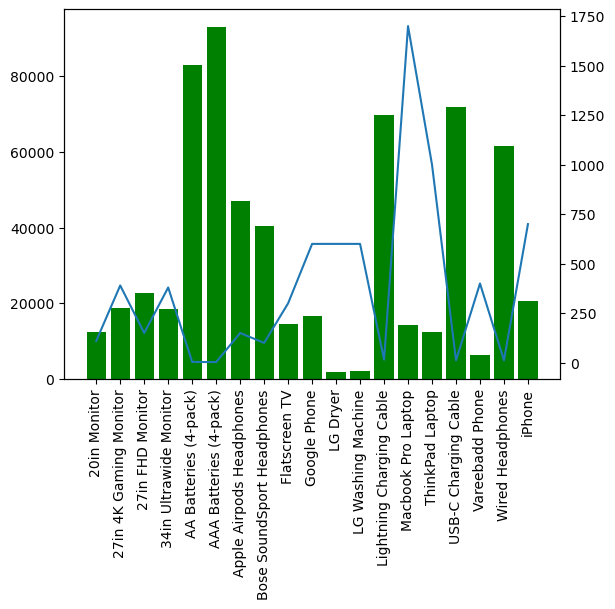

In [338]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(avg_price)
ax1.set_xticklabels(products, rotation = 'vertical')

#### What product are mostly sold together?

In [339]:
### This can be answered using the order ID. Products that are ordered together will have the same Order ID

duplicates_df = all_data1[all_data1['Order ID'].duplicated(keep= False)] # Creating a dataframe with duplicate order number and keeping all duplicates. False implies keep all duplicates. first would have eliminated subsequent occurence of a group
duplicates_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9


In [340]:
duplicates_df['grouped'] = duplicates_df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x)) # We are using transform since the column we are slicing or selecting contain text.

In [353]:
duplicates_df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours,grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
7,176563,Bose SoundSport Headphones,1,99.99,04/02/19 07:46,"668 Center St, Seattle, WA 98101",4,99.99,Seattle,7,"Bose SoundSport Headphones,Bose SoundSport Hea..."
8,176564,USB-C Charging Cable,1,11.95,04/12/19 10:58,"790 Ridge St, Atlanta, GA 30301",4,11.95,Atlanta,10,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
9,176565,Macbook Pro Laptop,1,1700.00,04/24/19 10:38,"915 Willow St, San Francisco, CA 94016",4,1700.00,San Francisco,10,"Macbook Pro Laptop,Macbook Pro Laptop,Macbook ..."
10,176566,Wired Headphones,1,11.99,04/08/19 14:05,"83 7th St, Boston, MA 02215",4,11.99,Boston,14,"Wired Headphones,Wired Headphones,Wired Headph..."
11,176567,Google Phone,1,600.00,04/18/19 17:18,"444 7th St, Los Angeles, CA 90001",4,600.00,Los Angeles,17,"Google Phone,Google Phone,Google Phone"


In [356]:
duplicates_df['grouped']

0         USB-C Charging Cable,USB-C Charging Cable,USB-...
2         Bose SoundSport Headphones,Bose SoundSport Hea...
3         Google Phone,Wired Headphones,Google Phone,Wir...
5         Wired Headphones,Wired Headphones,Wired Headph...
6         USB-C Charging Cable,USB-C Charging Cable,USB-...
                                ...                        
186845    AAA Batteries (4-pack),AAA Batteries (4-pack),...
186846                                 iPhone,iPhone,iPhone
186847                                 iPhone,iPhone,iPhone
186848    34in Ultrawide Monitor,34in Ultrawide Monitor,...
186849    USB-C Charging Cable,USB-C Charging Cable,USB-...
Name: grouped, Length: 178437, dtype: object

In [344]:
duplicates_df = duplicates_df.drop_duplicates(subset=['Order ID']) # droping duplicated rows
duplicates_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,month,sales,city,hours,grouped
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,"USB-C Charging Cable,USB-C Charging Cable,USB-..."
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,"Bose SoundSport Headphones,Bose SoundSport Hea..."
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,"Google Phone,Wired Headphones,Google Phone,Wir..."
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,"Wired Headphones,Wired Headphones,Wired Headph..."
6,176562,USB-C Charging Cable,1,11.95,04/29/19 13:03,"381 Wilson St, San Francisco, CA 94016",4,11.95,San Francisco,13,"USB-C Charging Cable,USB-C Charging Cable,USB-..."


<Axes: ylabel='grouped'>

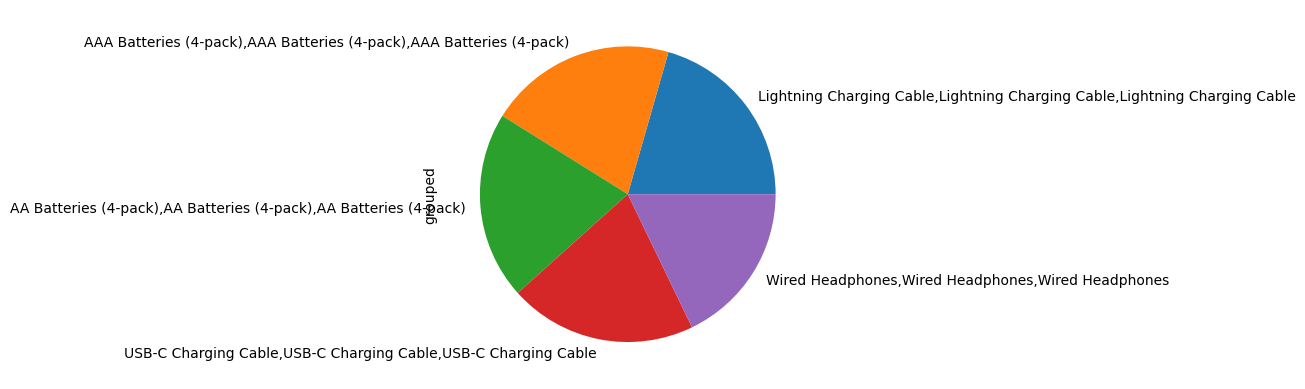

In [355]:
duplicates_df['grouped'].value_counts()[:5].plot.pie() # Counting the frequency of each group and ploting the top 5 groups

In [362]:
all_data1.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

0        USB-C Charging Cable,USB-C Charging Cable,USB-...
2        Bose SoundSport Headphones,Bose SoundSport Hea...
3        Google Phone,Wired Headphones,Google Phone,Wir...
4        Google Phone,Wired Headphones,Google Phone,Wir...
5        Wired Headphones,Wired Headphones,Wired Headph...
                               ...                        
11681    AAA Batteries (4-pack),AAA Batteries (4-pack),...
11682                                 iPhone,iPhone,iPhone
11683                                 iPhone,iPhone,iPhone
11684    34in Ultrawide Monitor,34in Ultrawide Monitor,...
11685    USB-C Charging Cable,USB-C Charging Cable,USB-...
Name: Product, Length: 557850, dtype: object